# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S3 E15 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>

**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>

**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.

A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**:

Using synthetic data for Playground competitions allows us to strike a balance between having real-world data (with named features) and ensuring test labels are not publicly available. This allows us to host competitions with more interesting datasets than in the past. While there are still challenges with synthetic data generation, the state-of-the-art is much better now than when we started the Tabular Playground Series two years ago, and that goal is to produce datasets that have far fewer artifacts. Please feel free to give us feedback on the datasets for the different competitions so that we can continue to improve!

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Crab Age Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

*Files*

* ```train.csv``` - the training dataset; Age is the target
* ```test.csv``` - the test dataset; your objective is to predict the probability of Age (the ground truth is int but you can predict int or float)
* ```sample_submission.csv``` - a sample submission file in the correct format
 
*Context*

The dataset is used to estimate the age of the crab based on the physical attributes. Its a great starting point for classical regression analysis and feature engineering and understand the impact of feature engineering in Data Science domain.

*Content*

Crab is very tasty and many countries of the world import huge amount of crabs for consumption every year. The main benefits of crab farming are, labor cost is very low, production cost is comparatively lower and they grow very fast. Commercial crab farming business is developing the lifestyle of the people of coastal areas. By proper care and management we can earn more from crab farming business than shrimp farming. You can raise mud crabs in two systems. Grow out farming and fattening systems.



**🟥ES**:

El uso de datos sintéticos para las competiciones Playground nos permite encontrar un equilibrio entre disponer de datos reales (con características nombradas) y garantizar que las etiquetas de las pruebas no estén a disposición del público. Esto nos permite organizar competiciones con conjuntos de datos más interesantes que en el pasado. Aunque la generación de datos sintéticos sigue planteando problemas, el estado actual de la técnica es mucho mejor que cuando empezamos con las Tabular Playground Series hace dos años, y el objetivo es producir conjuntos de datos que tengan muchos menos artefactos. No dude en hacernos llegar sus comentarios sobre los conjuntos de datos de los distintos concursos para que podamos seguir mejorando.

El conjunto de datos para esta competición (tanto de entrenamiento como de prueba) se generó a partir de un modelo de aprendizaje profundo entrenado en el conjunto de datos Crab Age Prediction. Las distribuciones de las características son parecidas, aunque no exactamente iguales, a las del original. Siéntete libre de usar el conjunto de datos original como parte de esta competición, tanto para explorar las diferencias como para ver si la incorporación del original en el entrenamiento mejora el rendimiento del modelo.


*Archivos*

* ```train.csv``` - el conjunto de datos de entrenamiento; Age es el objetivo
* ```test.csv``` - el conjunto de datos de prueba; tu objetivo es predecir la probabilidad de Edad (la verdad es int pero puedes predecir int o float)
* ```sample_submission.csv``` - un archivo de envío de muestra en el formato correcto
 
*Contexto*

El conjunto de datos se utiliza para estimar la edad del cangrejo basándose en los atributos físicos. Es un buen punto de partida para el análisis de regresión clásico y la ingeniería de características y comprender el impacto de la ingeniería de características en el dominio de la Ciencia de Datos.

*Contenido*

El cangrejo es muy sabroso y muchos países del mundo importan grandes cantidades de cangrejos para su consumo cada año. Las principales ventajas de la cría de cangrejos son que el coste de la mano de obra es muy bajo, el coste de producción es comparativamente más bajo y crecen muy rápido. La cría comercial de cangrejos está mejorando el estilo de vida de los habitantes de las zonas costeras. Con un cuidado y una gestión adecuados, podemos ganar más con la cría de cangrejos que con la de gambas. Se pueden criar cangrejos de fango en dos sistemas. La cría al aire libre y los sistemas de engorde.

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Library import</p>

In [1]:
import os 
import sys
import math
import time
import torch
import random
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

from xgboost import XGBRegressor
from scipy.cluster import hierarchy
from sklearn.model_selection import KFold
from scipy.spatial.distance import squareform
from sklearn.metrics import mean_absolute_error
from scipy.cluster.hierarchy import linkage, dendrogram

warnings.filterwarnings('ignore')

In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL
plt.style.use({"figure.facecolor": "#282a36"})

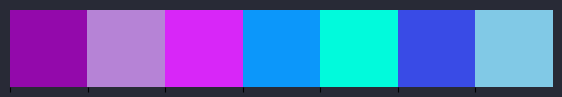

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]
INCLUDE_ORIGINAL = True
RANDOM_STATE = 500

sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))
SEED = 500

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/playground-series-s3e16"
TEST_FILENAME = "test.csv"
TRAIN_FILENAME = "train.csv"
SUBMISSION_FILENAME = "sample_submission.csv"
ORIGINAL_PATH = "/kaggle/input/crab-age-prediction/CrabAgePrediction.csv"

# Data dir
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME)
TEST_DIR = os.path.join(PATH, TEST_FILENAME)
SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)

In [5]:
ID = "id"
SEX = "Sex"
LENGTH = "Length"
DIAMETER = "Diameter"
HEIGHT = "Height"
WEIGHT = "Weight"
SHUCKED_WEIGHT = "Shucked Weight"
VISCERA_WEIGHT = "Viscera Weight"
SHELL_WEIGHT = "Shell Weight"
TARGET = "Age"

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [6]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    plt.show()

In [7]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [8]:
def show_distance(df, title="Show distance"):
    hierarchy.set_link_color_palette(PALETTE_7_C)
    # Calculate the Spearman correlation matrix
    correlation = df.corr(method='spearman')
    
    # Calculate the distance matrix using the absolute correlation values
    dist = linkage(squareform(1 - abs(correlation)), 'complete')
    
    # Create a new figure for the dendrogram plot
    plt.figure(figsize=(8, 4), dpi=100)
    dn = dendrogram(dist, labels=df.columns, above_threshold_color=PALETTE_3[2], orientation='right')
    hierarchy.set_link_color_palette(None)
    
    plt.title(title, size=20, weight='bold')
    plt.show()

In [9]:
## Boolean values only
def pie_plot(df: pd.DataFrame, hover_temp: str = "Status: ",
            feature=TARGET, palette=[LIGTH_BLUE,"#221e8f"], color=[BLUE ,DARK_BLUE],
            title="Target distribution"):
#     df[feature] = df[feature].replace({0: "Not cancelled ", 1: "Cancelled"})
    target = df[[feature]].value_counts(normalize=True).sort_index().round(decimals=3)*100
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                        sort=False, showlegend=True, marker=dict(colors=color, line=dict(color=palette,width=2)),
                        hovertemplate = "%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title, 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=600)
    fig.show()

In [10]:
def pie_plot_cat(df: pd.DataFrame, column: str, hover_temp: str = "Status: ",
             palette=None, color=None, title="Target distribution", height=600):
    target = df[column].value_counts(normalize=True).sort_index().round(decimals=3) * 100
    num_values = len(target.index)
    
    if palette is None:
        palette = [LIGTH_BLUE] * num_values  # Set a default color palette
    
    if color is None:
        color = [BLUE] * num_values  # Set a default color list
    
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                         sort=False, showlegend=True,
                         marker=dict(colors=color, line=dict(color=palette, width=2)),
                         hovertemplate="%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title, 
                      legend=dict(traceorder='reversed', y=1.05, x=0),
                      uniformtext_minsize=15, uniformtext_mode='hide', height=height)
    fig.show()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [11]:
train_df = pd.read_csv(TRAIN_DIR)
test_df = pd.read_csv(TEST_DIR)
submission_df = pd.read_csv(SUBMISSION_DIR)
original_df = pd.read_csv(ORIGINAL_PATH)

In [12]:
train_df.drop(ID, axis=1, inplace=True)
test_df.drop(ID, axis=1, inplace=True)

In [13]:
train_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [14]:
test_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [15]:
original_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [16]:
print("Train dataframe description\n")
data_description(train_df)
print("\n\n\n\nTest dataframe description\n")
data_description(test_df)
print("\n\n\n\nOriginal dataframe description\n")
data_description(original_df)

Train dataframe description

Data description
Total number of records 74051
number of features 9


             Name     Type  Unique levels  Missing
0             Sex   object              3        0
1          Length  float64            144        0
2        Diameter  float64            122        0
3          Height  float64             65        0
4          Weight  float64           3096        0
5  Shucked Weight  float64           1766        0
6  Viscera Weight  float64            967        0
7    Shell Weight  float64           1048        0
8             Age    int64             28        0




Test dataframe description

Data description
Total number of records 49368
number of features 8


             Name     Type  Unique levels  Missing
0             Sex   object              3        0
1          Length  float64            140        0
2        Diameter  float64            122        0
3          Height  float64             57        0
4          Weight  float64        

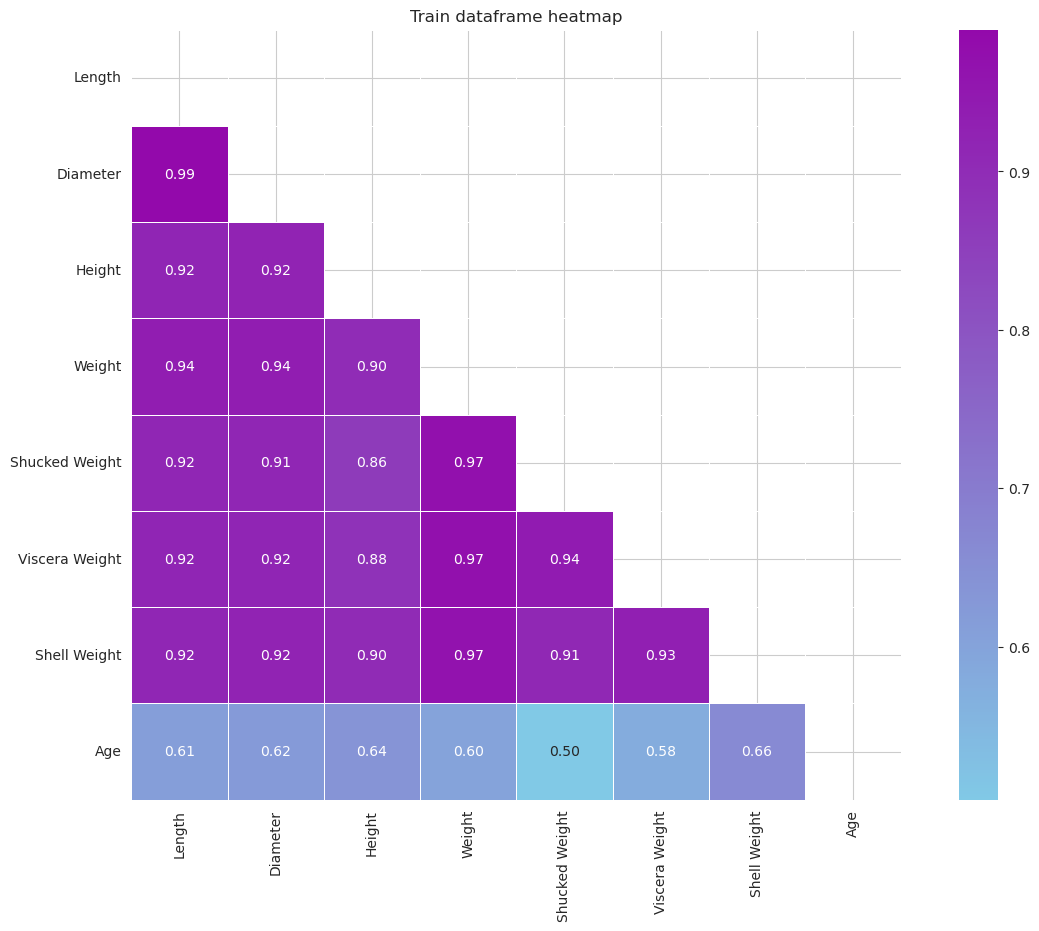

None

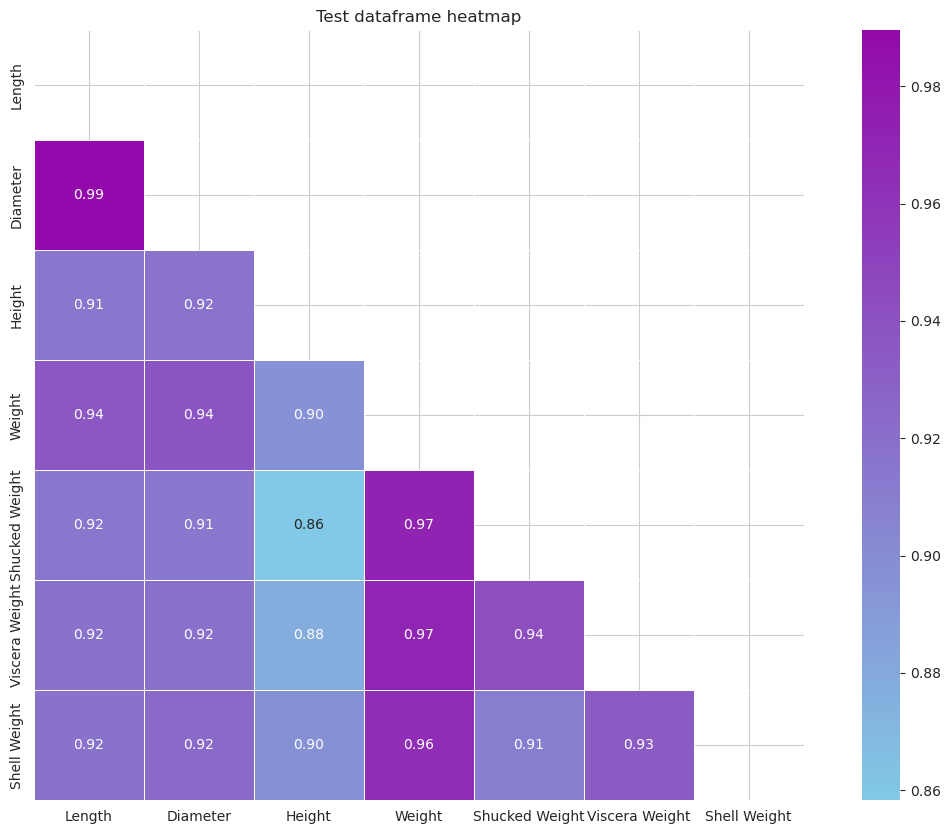

None

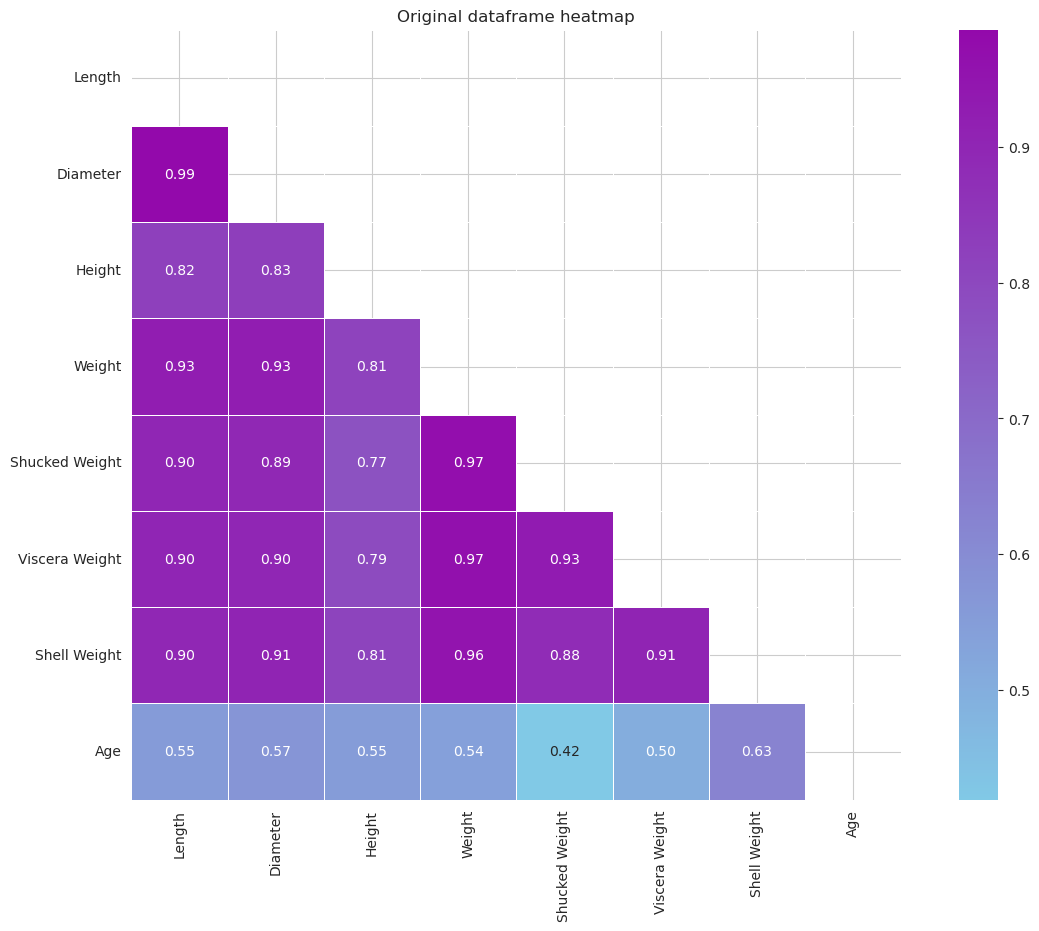

None

In [17]:
display(show_corr_heatmap(train_df, "Train dataframe heatmap"))
display(show_corr_heatmap(test_df, "Test dataframe heatmap"))
display(show_corr_heatmap(original_df, "Original dataframe heatmap"))

In [18]:
labels = ["train", "test", "original"]
comb_df = pd.concat([
    train_df.assign(set=labels[0]),
    test_df.assign(set=labels[1]),
    original_df.assign(set=labels[2]),
])
comb_df.reset_index(inplace=True)

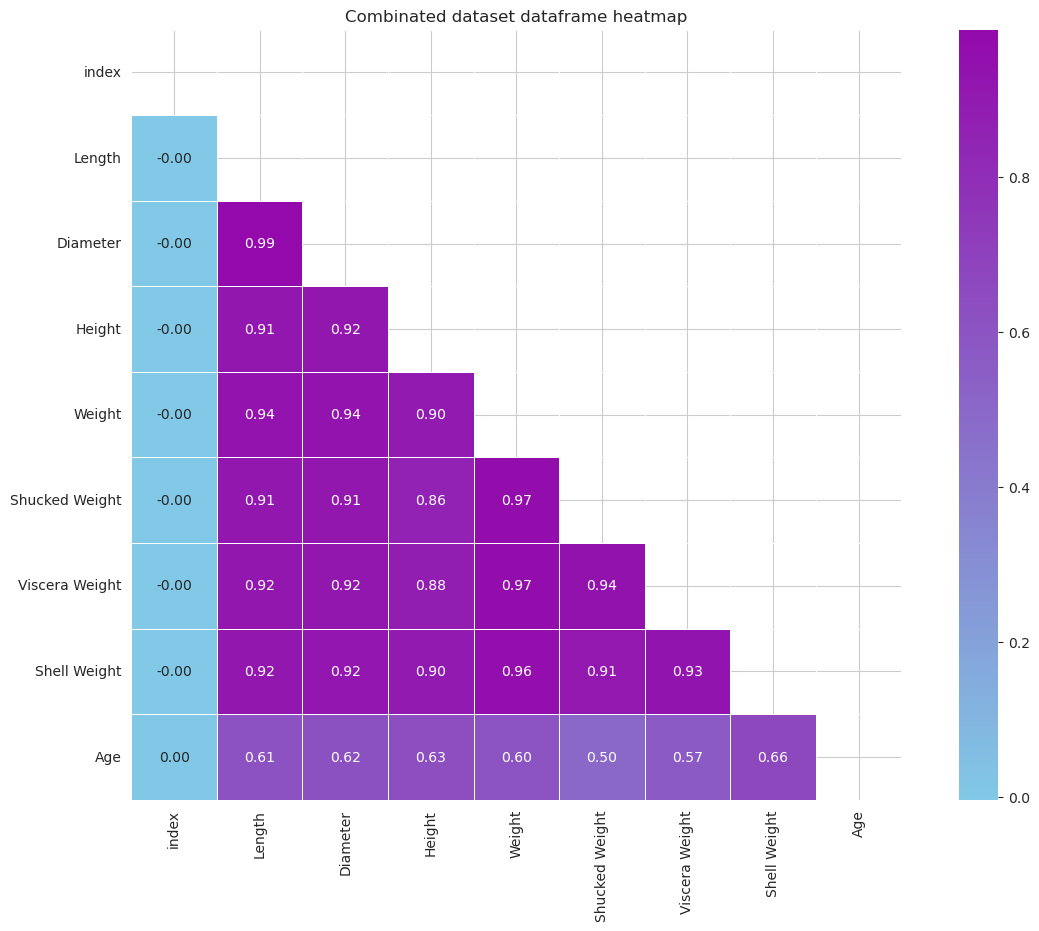

None

In [19]:
display(show_corr_heatmap(comb_df, "Combinated dataset dataframe heatmap"))

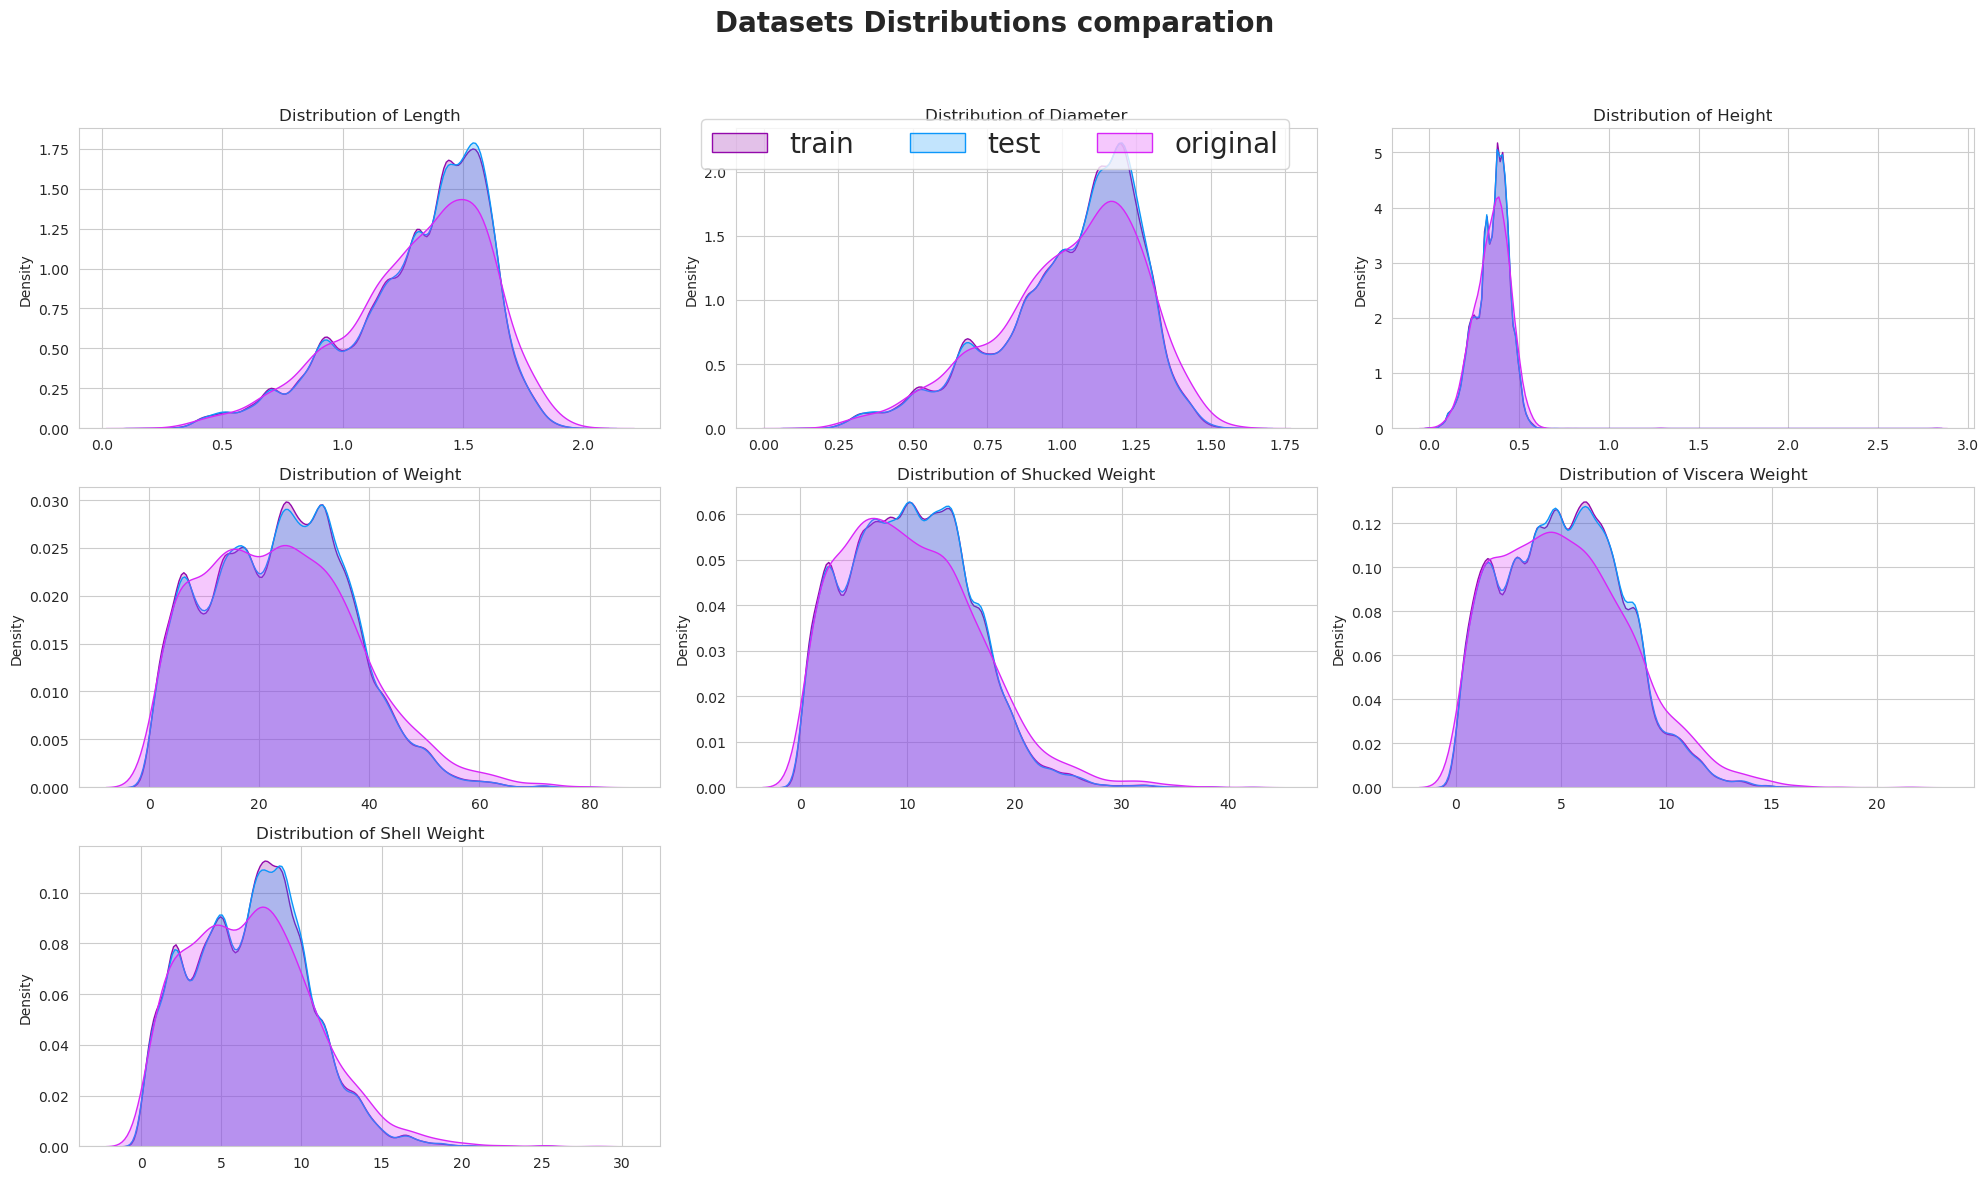

In [20]:
columns = test_df.columns
columns = columns.drop(SEX)
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
          
    sns.kdeplot(
        train_df[column], label="Train PS dataframe",
        ax=ax[i], color=PALETTE_7_C[0], fill = True
    )

    sns.kdeplot(
        test_df[column], label="Test PS datafraem",
        ax=ax[i], color=PALETTE_7_C[1], fill = True
    )
    
    sns.kdeplot(
        original_df[column], label="Original train dataframe",
        ax=ax[i], color=PALETTE_7_C[2], fill = True
    )
    
    # titles
    ax[i].set_title(f"Distribution of {column}");
    ax[i].set_xlabel(None)
    
    plot_axes = [ax[i]]
    handles = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis("off")
    
fig.suptitle(f"Datasets Distributions comparation\n\n", fontsize=20, ha="center", fontweight="bold")
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.9), fontsize=20, ncol=4)
plt.tight_layout()

In [21]:
num_cols = train_df.select_dtypes(include=['float64']).columns.tolist()
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()

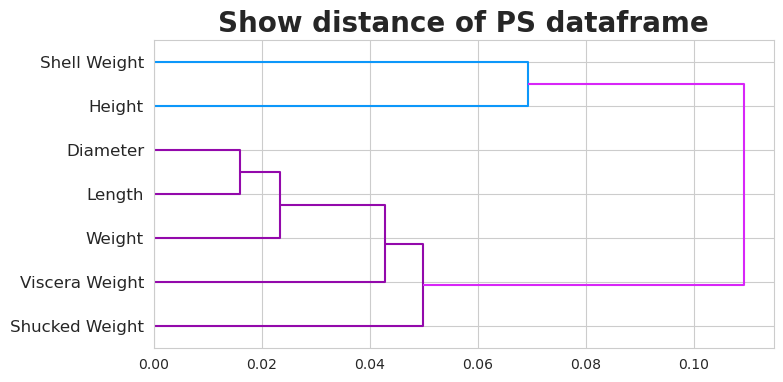

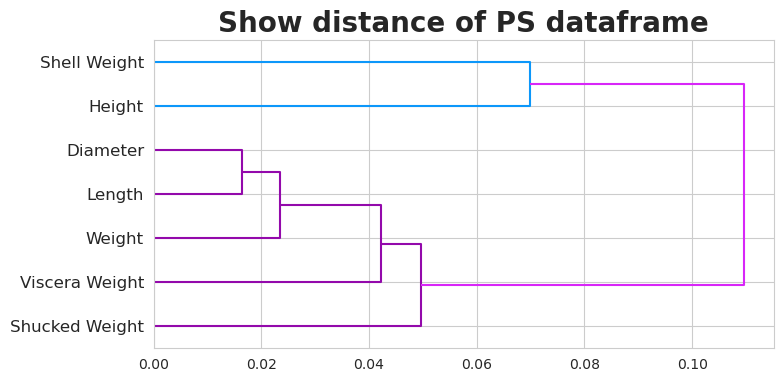

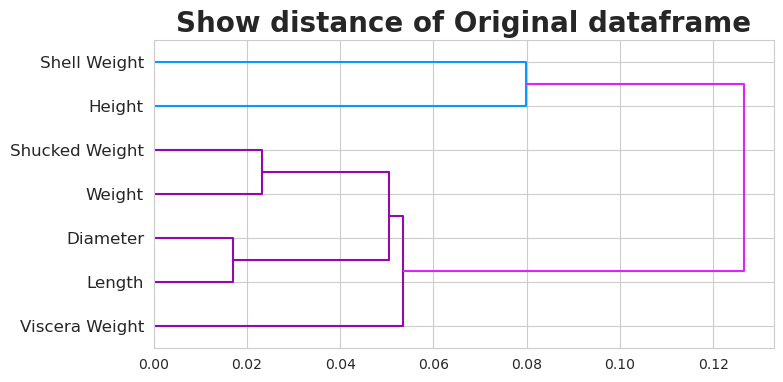

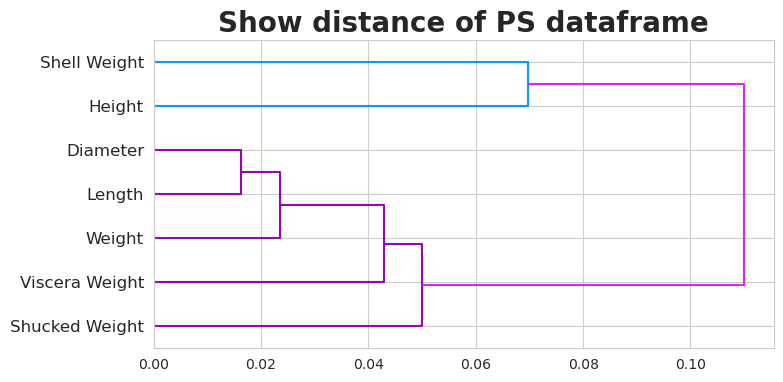

In [22]:
show_distance(train_df[num_cols], "Show distance of PS dataframe")
show_distance(test_df[num_cols], "Show distance of PS dataframe")
show_distance(original_df[num_cols], "Show distance of Original dataframe")
show_distance(comb_df[num_cols], "Show distance of PS dataframe")

Text(0.5, 1.0, 'Age / Length')

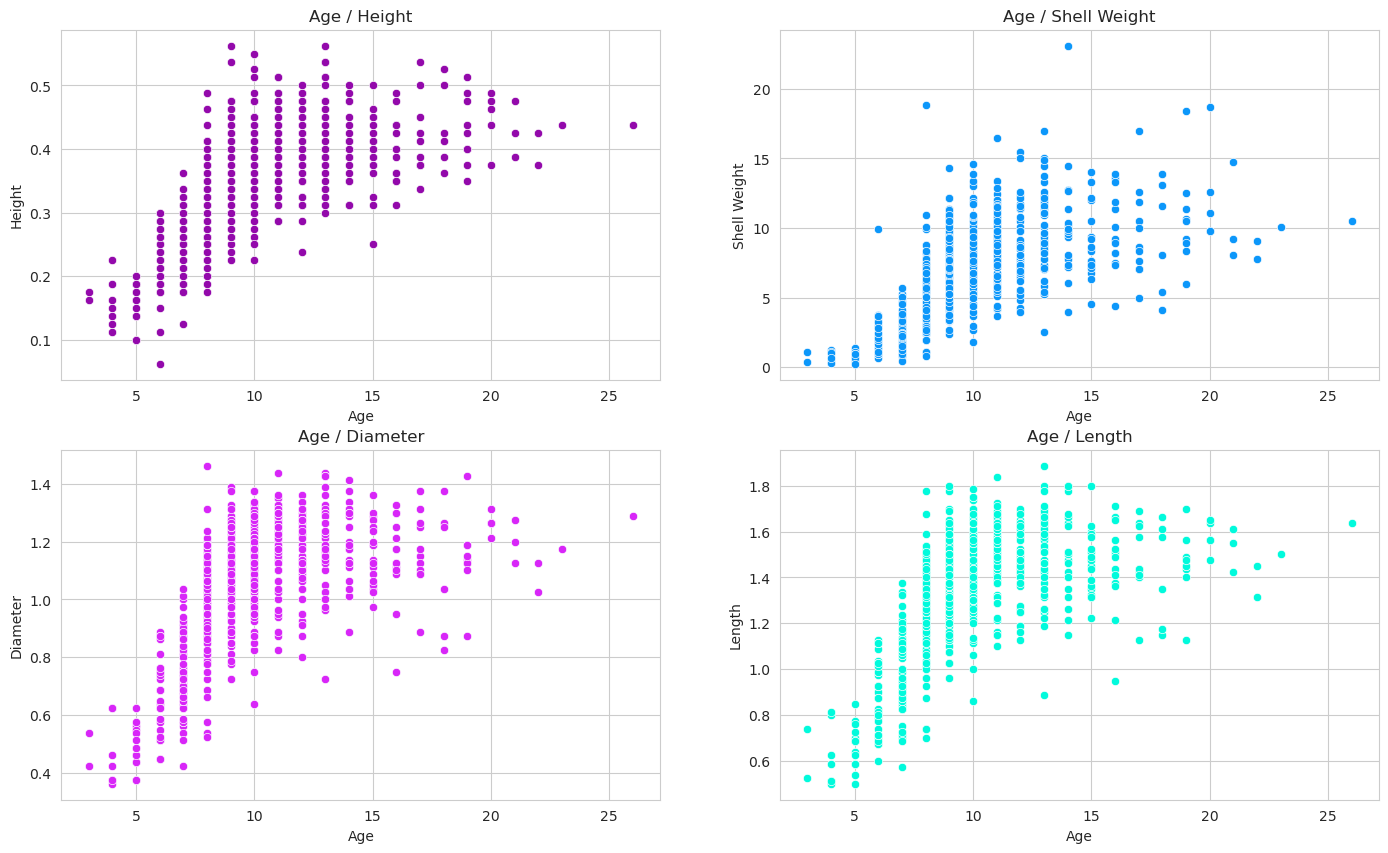

In [23]:
filtred_df = train_df.iloc[::100]

fig, ax = plt.subplots(2, 2, figsize=(17, 10))

sns.scatterplot(ax=ax[0,0], data=filtred_df, x=TARGET,y=HEIGHT, color=PALETTE_7_C[0])
ax[0, 0].set_title(f"{TARGET} / {HEIGHT}")
sns.scatterplot(ax=ax[0,1], data=filtred_df, x=TARGET,y=SHELL_WEIGHT, color=PALETTE_7_C[1])
ax[0, 1].set_title(f"{TARGET} / {SHELL_WEIGHT}")
sns.scatterplot(ax=ax[1,0], data=filtred_df, x=TARGET,y=DIAMETER, color=PALETTE_7_C[2])
ax[1, 0].set_title(f"{TARGET} / {DIAMETER}")
sns.scatterplot(ax=ax[1,1], data=filtred_df, x=TARGET,y=LENGTH, color=PALETTE_7_C[3])
ax[1, 1].set_title(f"{TARGET} / {LENGTH}")

In [24]:
pie_plot_cat(train_df, SEX, color=PALETTE_7_C, height=500, title="Target distribution of geometry in train dataframe")

<Figure size 1600x1200 with 0 Axes>

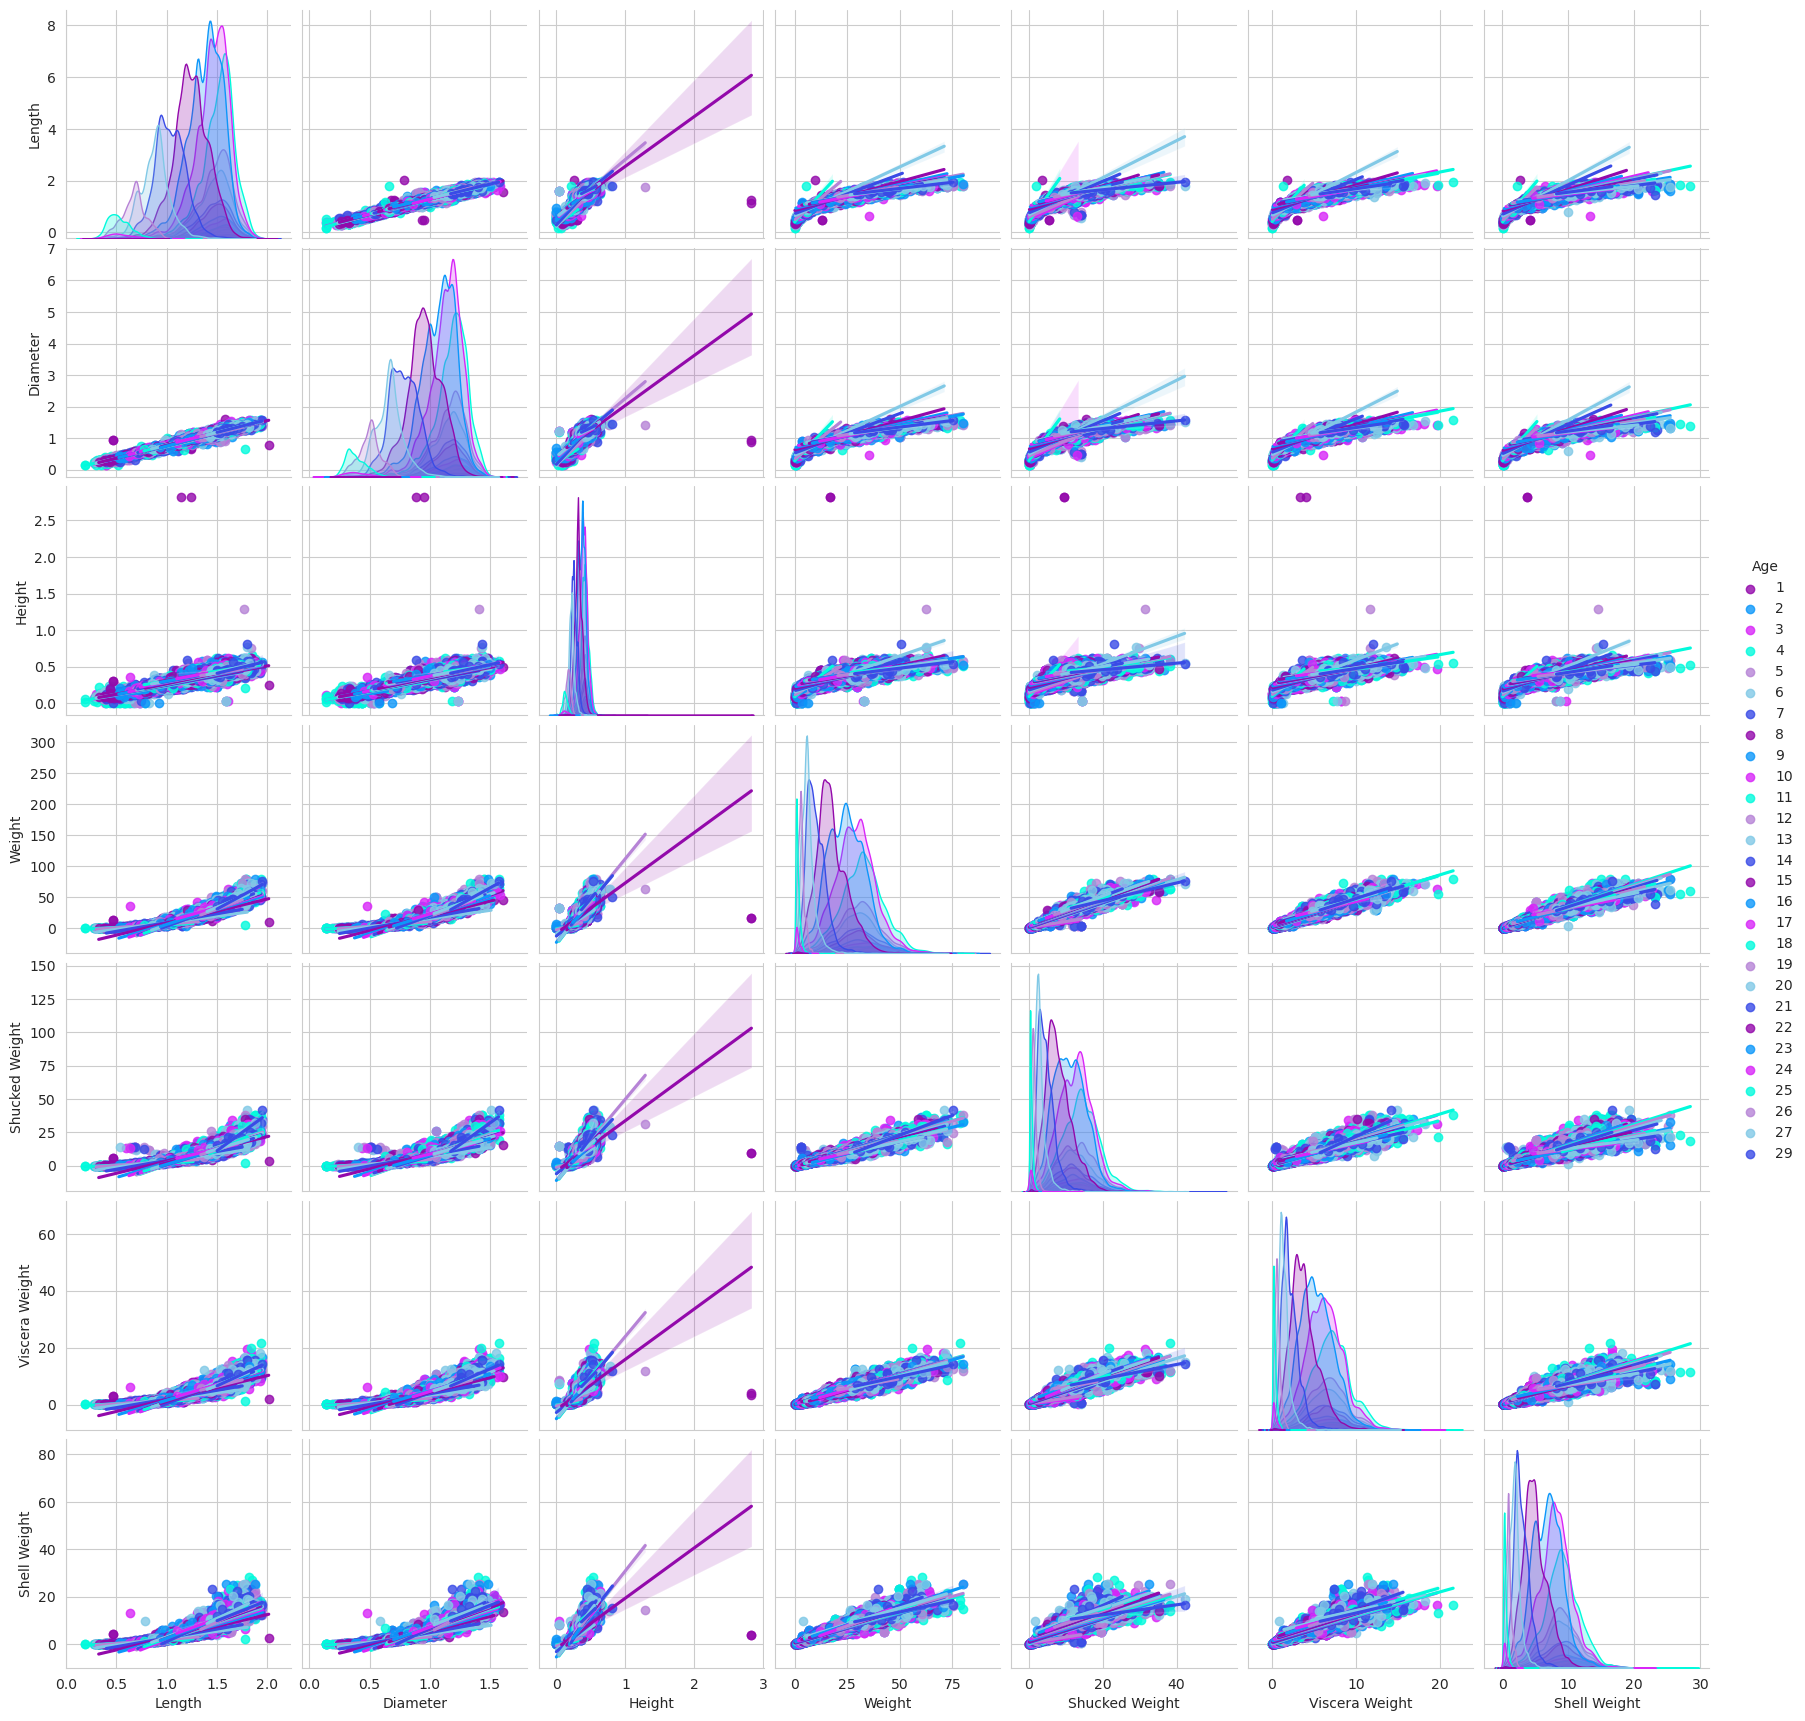

In [25]:
plt.figure(figsize=(16,12))
sns.pairplot(train_df, kind="reg", hue=TARGET, palette=PALETTE_7_C)
plt.show()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Model prediction</p>

In [26]:
cv_scr = list()
imp_xgb = list()
predictions = list()

X = train_df.drop(TARGET, axis=1)
Y = train_df[TARGET]

In [27]:
tree_method = "hist"
if torch.cuda.is_available():
    tree_method = "gpu_hist"
    

In [28]:
# Convert categorical columns to numeric codes
for col in cat_cols:
    X[col] = X[col].astype('category')
    X[col] = X[col].cat.codes

# Perform cross-validation loop
for i in range(10):
    # Generate a random integer as the seed
    rand_int = random.randint(0, 100000)
    print(f"\n{yllw}Fold {i+1}{res} CV begins with seed {red}{rand_int}{res}")
    
    # Initialize KFold with 3 splits using the random seed
    skf = KFold(n_splits=3, random_state=rand_int, shuffle=True)
    
    # Iterate over train-test splits generated by KFold
    for train_id, test_id in skf.split(X, Y):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_id], X.iloc[test_id]
        Y_train, Y_test = Y.iloc[train_id], Y.iloc[test_id]
        
        # Train an XGBoost regression model
        xgb_model = XGBRegressor(tree_method=tree_method,
                                gamma=0.8,
                                max_depth=5,
                                n_estimators=1600,
                                learning_rate=0.02,
                                min_child_weight=10,
                                colsample_bytree=0.8,
                                objective="reg:squarederror",
                                subsample=0.8).fit(X_train, Y_train)
        
        # Append feature importances of the model to a list
        imp_xgb.append(xgb_model.feature_importances_)
        
        # Make predictions on the test set
        xgb_prediction = xgb_model.predict(X_test)
        
        # Calculate mean absolute error (MAE) between predictions and true values
        mae = mean_absolute_error(Y_test, xgb_prediction)
        
        # Append MAE to a list
        cv_scr.append(mae)
        
        # Print the MAE for the current fold
        print(f"* Fold {i+1} MAE: {cyn}{mae:.4f}{res}")

# Calculate the average MAE across all folds
scr = np.mean(cv_scr)

# Print the average MAE
print(f"\nAVG MAE : {red}{scr:.5f}{res}")


Fold 1 CV begins with seed 52892
* Fold 1 MAE: 1.4074
* Fold 1 MAE: 1.4037
* Fold 1 MAE: 1.3943

Fold 2 CV begins with seed 32418
* Fold 2 MAE: 1.4055
* Fold 2 MAE: 1.3920
* Fold 2 MAE: 1.4135

Fold 3 CV begins with seed 68670
* Fold 3 MAE: 1.4107
* Fold 3 MAE: 1.4047
* Fold 3 MAE: 1.3937

Fold 4 CV begins with seed 50470
* Fold 4 MAE: 1.3922
* Fold 4 MAE: 1.4142
* Fold 4 MAE: 1.4061

Fold 5 CV begins with seed 73895
* Fold 5 MAE: 1.3973
* Fold 5 MAE: 1.4112
* Fold 5 MAE: 1.4009

Fold 6 CV begins with seed 87966
* Fold 6 MAE: 1.4020
* Fold 6 MAE: 1.4020
* Fold 6 MAE: 1.4042

Fold 7 CV begins with seed 32089
* Fold 7 MAE: 1.4020
* Fold 7 MAE: 1.4024
* Fold 7 MAE: 1.4047

Fold 8 CV begins with seed 75362
* Fold 8 MAE: 1.3884
* Fold 8 MAE: 1.4015
* Fold 8 MAE: 1.4133

Fold 9 CV begins with seed 5614
* Fold 9 MAE: 1.3916
* Fold 9 MAE: 1.4025
* Fold 9 MAE: 1.4113

Fold 10 CV begins with seed 35328
* Fold 10 MAE: 1.3922
* Fold 10 MAE: 1.4027
* Fold 10 MAE: 1.4128

AVG MAE : 1.40270


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Submission</p>

In [29]:
print(f"Test shape: {test_df.shape}\nSubmission shape: {submission_df.shape}")

Test shape: (49368, 8)
Submission shape: (49368, 2)


In [30]:
for col in cat_cols:
    test_df[col] = test_df[col].astype('category')
    test_df[col] = test_df[col].cat.codes

In [31]:
pred = xgb_model.predict(test_df)
submission_df[TARGET] = pred
submission_df.to_csv("submission.csv", index=False)